In [1]:
# 20-21
# Download the dataset from Google Drive
!gdown --id '1zpj8i4Lx27hzX7Go86IdZ0d0exCXKoDe&export' --output nba2122.zip
!gdown --id '1_16P0k9O5i8mYOIw9oWPzHqXQ2PMMZWn&export' --output team.p

# # Unzip the dataset.
!unzip -o nba2122.zip
!ls

串流輸出內容已截斷至最後 5000 行。
  inflating: pass/01-17-2022/OKC.csv  
  inflating: pass/01-17-2022/ORL.csv  
  inflating: pass/01-17-2022/PHI.csv  
  inflating: pass/01-17-2022/PHX.csv  
  inflating: pass/01-17-2022/POR.csv  
  inflating: pass/01-17-2022/SAS.csv  
  inflating: pass/01-17-2022/TOR.csv  
  inflating: pass/01-17-2022/UTA.csv  
  inflating: pass/01-17-2022/WAS.csv  
   creating: pass/01-18-2022/
  inflating: pass/01-18-2022/DET.csv  
  inflating: pass/01-18-2022/GSW.csv  
  inflating: pass/01-18-2022/MIN.csv  
  inflating: pass/01-18-2022/NYK.csv  
   creating: pass/01-19-2022/
  inflating: pass/01-19-2022/ATL.csv  
  inflating: pass/01-19-2022/BKN.csv  
  inflating: pass/01-19-2022/BOS.csv  
  inflating: pass/01-19-2022/CHA.csv  
  inflating: pass/01-19-2022/CHI.csv  
  inflating: pass/01-19-2022/CLE.csv  
  inflating: pass/01-19-2022/DAL.csv  
  inflating: pass/01-19-2022/DEN.csv  
  inflating: pass/01-19-2022/DET.csv  
  inflating: pass/01-19-2022/HOU.csv  
  inflating: pass/01-1

In [2]:
# Import necessary packages
import numpy as np
import pandas as pd
import os
import pickle

In [3]:
name_map = pickle.load(open("name_map.p", "rb"))

In [4]:
feat_list = ['FG_PCT', 'FG3_PCT', 'FT_PCT', 'OREB', 'AST', 'DREB', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS']
feat_name_list = ['field goal percentage', '3-point field goal percentage', 'free throw percentage', 'number of offensive rebounds', 'number of assists', 'number of defensive rebounds', 'number of steals', 'number of blocks', 'number of turnovers', 'number of personal fouls', 'number of points scored', 'plus-minus']
player_dict = dict.fromkeys(list(name_map.keys()))
for k in player_dict.keys():
  player_dict[k] = dict()
  for f in feat_list:
     player_dict[k][f] = []

In [5]:
start_date = '10/19/2021'
end_date = '04/15/2022'
date_list = [d.strftime('%m-%d-%Y') for d in pd.date_range(start=start_date, end=end_date)]

In [6]:
for d in date_list:
  dir_list = os.listdir(os.path.join('data', d))
  for dir in dir_list:
    df = pd.read_csv(os.path.join('data', d, dir))
    for index, row in df.iterrows():
      for f in feat_list:
        if row['PLAYER_NAME'] in player_dict.keys():
          player_dict[row['PLAYER_NAME']][f].append(row[f])

In [7]:
feat_dict = dict.fromkeys(feat_list)
i = 0
for f in feat_list:
  ave = list()
  for p in player_dict.keys():
    if i > 2:
      ave.append(sum(player_dict[p][f]) / len(player_dict[p][f]))
    else:
      ave.append((sum(player_dict[p][f]) / len(player_dict[p][f]))*100)
  feat_dict[f] = ave
  i += 1

In [8]:
import matplotlib.pyplot as plt

In [9]:
bin_list = [10, 10, 10, range(6), range(12), range(12), [0, 0.5, 1, 1.5, 2, 2.5], [0, 0.5, 1, 1.5, 2, 2.5], range(6), range(5),
            [0, 5, 10, 15, 20, 25, 30, 35], [-15, -10, -5, 0, 5, 10, 15]]

In [27]:
num_bin = [
    [-1, 0, 20, 40, 60, 80, 100], [-1, 0, 20, 40, 60, 80, 100], [-1, 0, 20, 40, 60, 80, 100],
    [-1, 0, 1, 2, 3, 4, 5], [-1, 0, 2, 4, 6, 8, 10, 12], [-1, 0, 2, 4, 6, 8, 10, 12],
     [-1, 0, 1, 2, 3], [-1, 0, 1, 2, 3], [-1, 0, 1, 2, 3, 4, 5], [-1, 0, 1, 2, 3, 4],
            [-1, 0, 10, 20, 30, 40], [-15, -10, -5, 0, 5, 10, 15]]
def count(list1, l, r):
  c = 0
  for x in list1:
    if x > l and x <= r:
      c+= 1
  return c

i = 0
for f in feat_list:
  print(f)
  for n in range(len(num_bin[i])):
    if n != 0:
      print("range: {} => num: {}".format(num_bin[i][n], count(feat_dict[f], num_bin[i][n-1], num_bin[i][n])))
  i += 1

FG_PCT
range: 0 => num: 22
range: 20 => num: 30
range: 40 => num: 218
range: 60 => num: 288
range: 80 => num: 25
range: 100 => num: 1
FG3_PCT
range: 0 => num: 81
range: 20 => num: 147
range: 40 => num: 332
range: 60 => num: 24
range: 80 => num: 0
range: 100 => num: 0
FT_PCT
range: 0 => num: 51
range: 20 => num: 113
range: 40 => num: 183
range: 60 => num: 148
range: 80 => num: 75
range: 100 => num: 14
OREB
range: 0 => num: 37
range: 1 => num: 376
range: 2 => num: 128
range: 3 => num: 32
range: 4 => num: 9
range: 5 => num: 2
AST
range: 0 => num: 27
range: 2 => num: 360
range: 4 => num: 124
range: 6 => num: 48
range: 8 => num: 18
range: 10 => num: 5
range: 12 => num: 2
DREB
range: 0 => num: 13
range: 2 => num: 223
range: 4 => num: 250
range: 6 => num: 62
range: 8 => num: 23
range: 10 => num: 11
range: 12 => num: 2
STL
range: 0 => num: 43
range: 1 => num: 451
range: 2 => num: 87
range: 3 => num: 3
BLK
range: 0 => num: 71
range: 1 => num: 477
range: 2 => num: 31
range: 3 => num: 5
TOV
range

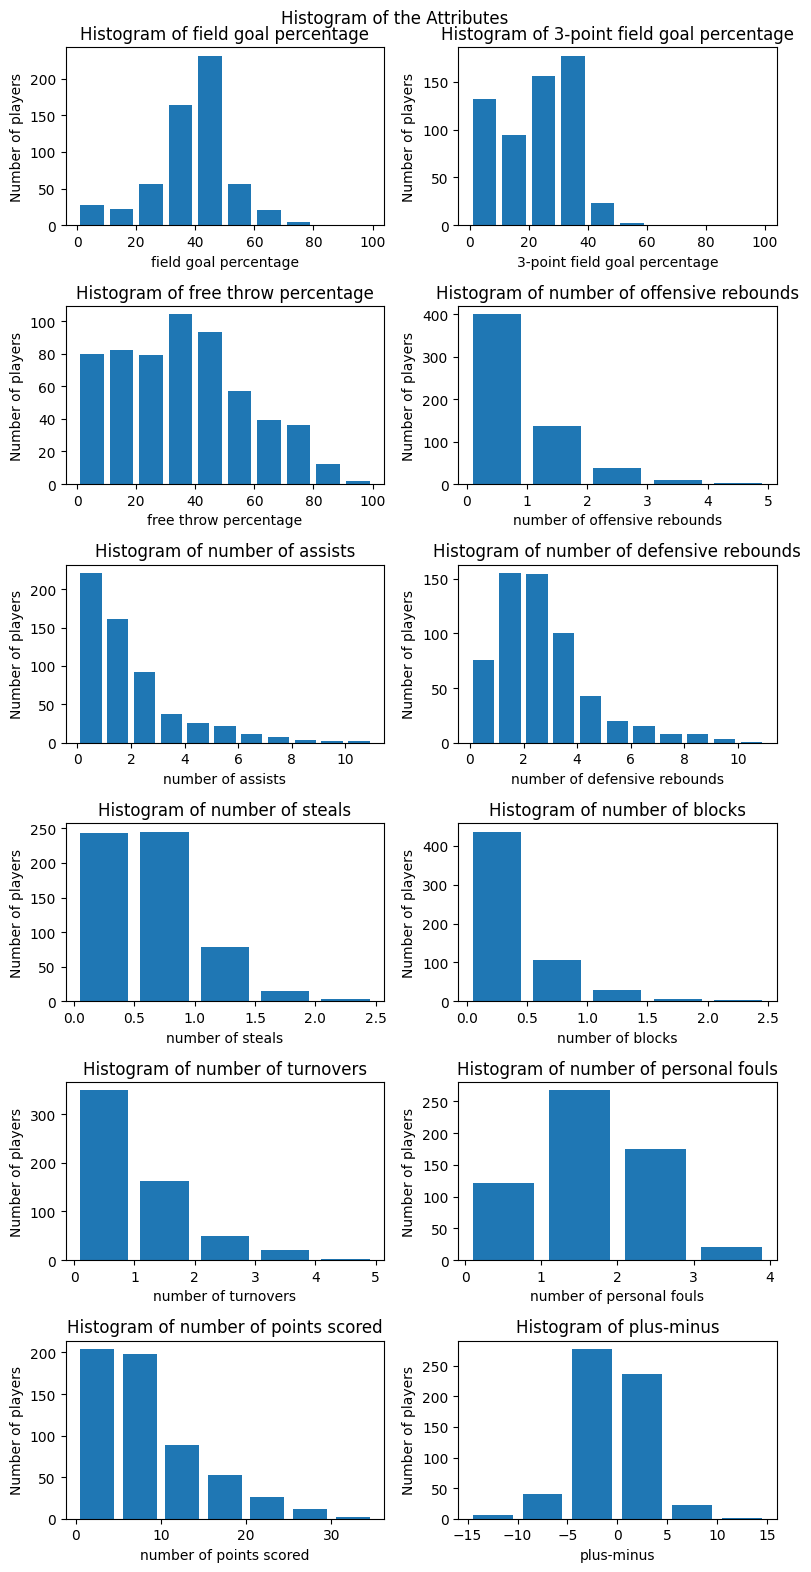

In [12]:
si = 0
plt.figure(figsize=(8, 16))
for f in feat_list:
  plt.subplot(6, 2, i+1)
  plt.xlabel(feat_name_list[i])
  plt.ylabel("Number of players")
  plt.title('Histogram of {}'.format(feat_name_list[i]))
  if i == 1:
    plt.hist(feat_dict[f], bins=bin_list[i], rwidth=0.8, range=(0, 100))
  else:
    plt.hist(feat_dict[f], bins=bin_list[i], rwidth=0.8)
  i += 1

plt.suptitle("Histogram of the Attributes")
plt.tight_layout()